In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Step 1: Data Preprocessing

# Load your data (assuming it is already in a DataFrame)

data = pd.read_excel("NEW DATA SHEET (copy) with features.xlsx")  

In [2]:
data.head()

,Number,Dozen,Column,odd/even,red / black,series,Group
0,6,D 1,C 3,EVEN,BLACK,B,G2
1,10,D 1,C 1,EVEN,BLACK,C,G2
2,35,D 3,C 2,ODD,BLACK,A,G1
3,0,0,0,EVEN,GREEN,A,G1
4,20,D 2,C 2,EVEN,BLACK,B,G2


In [3]:
categorical_columns=['Dozen', 'Column', 'odd/even', 'red / black', 'series', "Group"]   
# Convert all categorical columns to strings to ensure uniformity
data[categorical_columns] = data[categorical_columns].astype(str)

In [4]:
data.Dozen.value_counts()

Dozen
D 1    16628
D 2    16395
D 3    16268
D2      4279
D3      4201
D1      4138
0       1763
Name: count, dtype: int64

In [5]:
data.series.value_counts()

series
A    29187
C    20739
B    13746
Name: count, dtype: int64

In [6]:
data.Group.value_counts()


Group
G1    32693
G2    30979
Name: count, dtype: int64

In [7]:
data.columns

Index(['Number', 'Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group'],
      dtype='object')

In [8]:
for i in ['Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group']:
    # print(i)
    print(data[i].value_counts())
    print("\n")

Dozen
D 1    16628
D 2    16395
D 3    16268
D2      4279
D3      4201
D1      4138
0       1763
Name: count, dtype: int64


Column
C 2    16504
C 3    16421
C 1    16368
C2      4335
C3      4163
C1      4118
0       1763
Name: count, dtype: int64


odd/even
EVEN    32529
ODD     30799
nan       344
Name: count, dtype: int64


red / black
BLACK    30987
RED      30922
GREEN     1763
Name: count, dtype: int64


series
A    29187
C    20739
B    13746
Name: count, dtype: int64


Group
G1    32693
G2    30979
Name: count, dtype: int64




In [9]:
data.Dozen.replace({"D 1":"D1", "D 2":"D2", "D 3":"D3"}, inplace=True)
data.Column.replace({"C 1":"C1", "C 2":"C2", "C 3":"C3"}, inplace=True)
data["odd/even"].replace({"nan":"0"}, inplace=True)


C:\Users\Cilan\AppData\Local\Temp\ipykernel_25144\2176995894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Dozen.replace({"D 1":"D1", "D 2":"D2", "D 3":"D3"}, inplace=True)
C:\Users\Cilan\AppData\Local\Temp\ipykernel_25144\2176995894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [10]:
data.Dozen.value_counts()

Dozen
D1    20766
D2    20674
D3    20469
0      1763
Name: count, dtype: int64

In [11]:
data.Column.value_counts()

Column
C2    20839
C3    20584
C1    20486
0      1763
Name: count, dtype: int64

In [12]:
# data.Column.replace({"C 1":"C1", "C 2":"C2", "C 3":"C3"}, inplace=True)

In [13]:
data["odd/even"].value_counts()

odd/even
EVEN    32529
ODD     30799
0         344
Name: count, dtype: int64

In [14]:
data[data["odd/even"]=="0"]

,Number,Dozen,Column,odd/even,red / black,series,Group
50757,0,0,0,0,GREEN,A,G1
50759,0,0,0,0,GREEN,A,G1
50844,0,0,0,0,GREEN,A,G1
50861,0,0,0,0,GREEN,A,G1
50896,0,0,0,0,GREEN,A,G1
...,...,...,...,...,...,...,...
63519,0,0,0,0,GREEN,A,G1
63559,0,0,0,0,GREEN,A,G1
63587,0,0,0,0,GREEN,A,G1
63632,0,0,0,0,GREEN,A,G1


In [15]:
# data["odd/even"].replace({"nan":0}, inplace=True)

In [16]:
data["series"].value_counts()

series
A    29187
C    20739
B    13746
Name: count, dtype: int64

In [17]:
data["red / black"].value_counts()

red / black
BLACK    30987
RED      30922
GREEN     1763
Name: count, dtype: int64

In [18]:
data["Group"].value_counts()

Group
G1    32693
G2    30979
Name: count, dtype: int64

In [19]:
data["Dozen"].value_counts()

Dozen
D1    20766
D2    20674
D3    20469
0      1763
Name: count, dtype: int64

In [20]:
data["Column"].value_counts()

Column
C2    20839
C3    20584
C1    20486
0      1763
Name: count, dtype: int64

In [21]:
data["odd/even"].value_counts()

odd/even
EVEN    32529
ODD     30799
0         344
Name: count, dtype: int64

In [22]:
data.columns

Index(['Number', 'Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group'],
      dtype='object')

In [23]:
# for i in ['Dozen', 'Column', 'odd/even', 'red / black', 'series',
#        'Group']:
#     print(i, data[i].value_counts())

In [24]:
model_data=data.copy()

In [25]:
model_data.head()

,Number,Dozen,Column,odd/even,red / black,series,Group
0,6,D1,C3,EVEN,BLACK,B,G2
1,10,D1,C1,EVEN,BLACK,C,G2
2,35,D3,C2,ODD,BLACK,A,G1
3,0,0,0,EVEN,GREEN,A,G1
4,20,D2,C2,EVEN,BLACK,B,G2


In [26]:
model_data.columns


Index(['Number', 'Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group'],
      dtype='object')

In [27]:
model_data[model_data["Dozen"]=="0"]

,Number,Dozen,Column,odd/even,red / black,series,Group
3,0,0,0,EVEN,GREEN,A,G1
9,0,0,0,EVEN,GREEN,A,G1
43,0,0,0,EVEN,GREEN,A,G1
182,0,0,0,EVEN,GREEN,A,G1
433,0,0,0,EVEN,GREEN,A,G1
...,...,...,...,...,...,...,...
63519,0,0,0,0,GREEN,A,G1
63559,0,0,0,0,GREEN,A,G1
63587,0,0,0,0,GREEN,A,G1
63632,0,0,0,0,GREEN,A,G1


In [28]:
#Remove rows with 0 in Dozen, Column, odd/even, red/black, series, Group
model_data=model_data[model_data["Dozen"]!="0"]
# model_data[model_data["Column"]=="0"]

In [29]:
for i in ['Dozen', 'Column', 'odd/even', 'red / black', 'series',"Group"]:
    print(i, model_data[i].value_counts())

Dozen Dozen
D1    20766
D2    20674
D3    20469
Name: count, dtype: int64
Column Column
C2    20839
C3    20584
C1    20486
Name: count, dtype: int64
odd/even odd/even
EVEN    31110
ODD     30799
Name: count, dtype: int64
red / black red / black
BLACK    30987
RED      30922
Name: count, dtype: int64
series series
A    27424
C    20739
B    13746
Name: count, dtype: int64
Group Group
G2    30979
G1    30930
Name: count, dtype: int64


In [30]:
model_data.columns

Index(['Number', 'Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group'],
      dtype='object')

In [31]:
model_data.head()

,Number,Dozen,Column,odd/even,red / black,series,Group
0,6,D1,C3,EVEN,BLACK,B,G2
1,10,D1,C1,EVEN,BLACK,C,G2
2,35,D3,C2,ODD,BLACK,A,G1
4,20,D2,C2,EVEN,BLACK,B,G2
5,12,D1,C3,EVEN,RED,A,G1


In [32]:
for i in ['Dozen', 'Column', 'odd/even', 'red / black', 'series',
       'Group']:
    print(i, model_data[i].value_counts())

Dozen Dozen
D1    20766
D2    20674
D3    20469
Name: count, dtype: int64
Column Column
C2    20839
C3    20584
C1    20486
Name: count, dtype: int64
odd/even odd/even
EVEN    31110
ODD     30799
Name: count, dtype: int64
red / black red / black
BLACK    30987
RED      30922
Name: count, dtype: int64
series series
A    27424
C    20739
B    13746
Name: count, dtype: int64
Group Group
G2    30979
G1    30930
Name: count, dtype: int64


In [33]:
model_data.dtypes

Number          int64
Dozen          object
Column         object
odd/even       object
red / black    object
series         object
Group          object
dtype: object

### Prediction on odd/even 

In [34]:
odd_even=model_data.copy()

In [35]:
categorical_columns=['Dozen', 'Column', 'odd/even', 'red / black', 'series', "Group"]

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    odd_even[column] = le.fit_transform(odd_even[column])
    label_encoders[column] = le

In [36]:
odd_even.head()

,Number,Dozen,Column,odd/even,red / black,series,Group
0,6,0,2,0,0,1,1
1,10,0,0,0,0,2,1
2,35,2,1,1,0,0,0
4,20,1,1,0,0,1,1
5,12,0,2,0,1,0,0


In [37]:
for i in categorical_columns:
    print(i, odd_even[i].value_counts())

Dozen Dozen
0    20766
1    20674
2    20469
Name: count, dtype: int64
Column Column
1    20839
2    20584
0    20486
Name: count, dtype: int64
odd/even odd/even
0    31110
1    30799
Name: count, dtype: int64
red / black red / black
0    30987
1    30922
Name: count, dtype: int64
series series
0    27424
2    20739
1    13746
Name: count, dtype: int64
Group Group
1    30979
0    30930
Name: count, dtype: int64


In [38]:
odd_even=odd_even.drop(["Number"], axis=1)

In [39]:
odd_even.head()

,Dozen,Column,odd/even,red / black,series,Group
0,0,2,0,0,1,1
1,0,0,0,0,2,1
2,2,1,1,0,0,0
4,1,1,0,0,1,1
5,0,2,0,1,0,0


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

def preprocess_data(data):
    # Check for columns with non-numeric data
    print("Checking data types before preprocessing:")
    print(data.dtypes)

    # Normalize 'Dozen', "series" and 'Column' values (if they are now numeric)
    scaler = StandardScaler()
    data[['Dozen', 'Group', 'Column', 'red / black', 'series']] = scaler.fit_transform(data[['Dozen', 'Group', 'Column', 'red / black', 'series']])

    # Fill missing values if necessary
    data = data.fillna(0)
    
    return data

# data = preprocess_data(data)



In [41]:
data=preprocess_data(odd_even)

Checking data types before preprocessing:
Dozen          int64
Column         int64
odd/even       int64
red / black    int64
series         int64
Group          int64
dtype: object


In [42]:
data.head() 

,Dozen,Column,odd/even,red / black,series,Group
0,-1.219447,1.225822,0,-0.998951,0.123352,0.999209
1,-1.219447,-1.229709,0,-0.998951,1.265703,0.999209
2,1.231204,-0.001944,1,-0.998951,-1.018998,-1.000792
4,0.005878,-0.001944,0,-0.998951,0.123352,0.999209
5,-1.219447,1.225822,0,1.001050,-1.018998,-1.000792


In [43]:
# Step 2: Prepare features (X) and target (y)
# We will predict 'series' for the next round

X = []
y = []

sequence_length = 5  # Number of previous rounds to consider as input
for i in range(len(data) - sequence_length):
    # print("-------------------")
    # print(i+sequence_length)
    # print(data.iloc[i:i+sequence_length].drop(columns=['Group']).values)
    X.append(data.iloc[i:i+sequence_length].drop(columns=['odd/even']).values)# Features (all columns except 'series')
    
    # print(data.iloc[i+sequence_length]['Group'])
    # print("________________")
    y.append(data.iloc[i+sequence_length]['odd/even'])  # Target (next round's 'series')

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])




In [44]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (61904, 5, 5)
y shape: (61904,)


In [45]:
X

array([[[-1.21944696,  1.22582181, -0.99895062,  0.12335221,
          0.99920883],
        [-1.21944696, -1.22970884, -0.99895062,  1.26570252,
          0.99920883],
        [ 1.23120362, -0.00194351, -0.99895062, -1.01899811,
         -1.0007918 ],
        [ 0.00587833, -0.00194351, -0.99895062,  0.12335221,
          0.99920883],
        [-1.21944696,  1.22582181,  1.00105048, -1.01899811,
         -1.0007918 ]],

       [[-1.21944696, -1.22970884, -0.99895062,  1.26570252,
          0.99920883],
        [ 1.23120362, -0.00194351, -0.99895062, -1.01899811,
         -1.0007918 ],
        [ 0.00587833, -0.00194351, -0.99895062,  0.12335221,
          0.99920883],
        [-1.21944696,  1.22582181,  1.00105048, -1.01899811,
         -1.0007918 ],
        [ 1.23120362,  1.22582181,  1.00105048,  1.26570252,
          0.99920883]],

       [[ 1.23120362, -0.00194351, -0.99895062, -1.01899811,
         -1.0007918 ],
        [ 0.00587833, -0.00194351, -0.99895062,  0.12335221,
          0

In [46]:
y

array([0., 0., 1., ..., 0., 0., 1.])

In [47]:
labels = data['odd/even'].values
# class_weights = compute_class_weight('balanced', np.unique(labels), labels)

In [48]:
unique_labels = np.unique(labels)

In [49]:
# from torch.utils.data import TensorDataset,DataLoader
# # Split into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert to PyTorch tensors
# x_train = torch.tensor(x_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.long)  # Use long for classification
# x_test = torch.tensor(x_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.long)

# # Create DataLoaders
# train_dataset = TensorDataset(x_train, y_train)
# test_dataset = TensorDataset(x_test, y_test)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [97]:
unique_labels=np.unique(labels)
unique_labels

array([0, 1])

In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [57]:
time_steps = sequence_length  # Number of past observations to consider
num_features = X.shape[1] 

In [71]:
# Train-Test Split (No separate validation set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

# ================================
# Step 2: Define the Model
# ================================
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model with a custom learning rate
learning_rate = 0.0001  
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ================================
# Step 3: Train the Model
# ================================
# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model2.keras', monitor='loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint]
)



Epoch 1/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5016 - loss: 0.6933
Epoch 2/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5026 - loss: 0.6931
Epoch 3/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5054 - loss: 0.6931
Epoch 4/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5075 - loss: 0.6930
Epoch 5/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5020 - loss: 0.6931
Epoch 6/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5070 - loss: 0.6930
Epoch 7/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5062 - loss: 0.6931
Epoch 8/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5045 - loss: 0.6931
Epoch 9/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5122 - loss: 0.6929
Epoch 10/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5105 - loss: 0.6929
Epoch 11/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5109 - loss: 0.6928
Epoch 12/50
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

20/20 - 1s - 29ms/step - accuracy: 0.4919 - loss: 0.6930
Test Loss: 0.6930
Test Accuracy: 0.4919
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


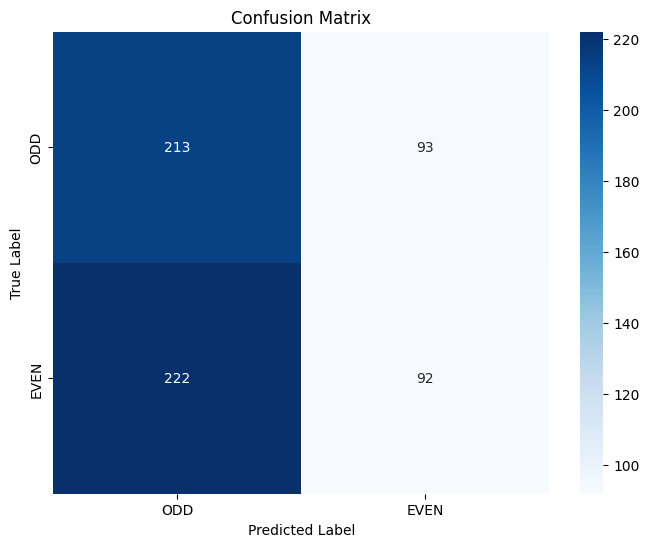

Classification Report:
              precision    recall  f1-score   support

         ODD       0.49      0.70      0.57       306
        EVEN       0.50      0.29      0.37       314

    accuracy                           0.49       620
   macro avg       0.49      0.49      0.47       620
weighted avg       0.49      0.49      0.47       620



In [68]:
# ================================
# Step 4: Evaluate the Model
# ================================
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["ODD", "EVEN"], yticklabels=["ODD", "EVEN"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=["ODD", "EVEN"])
print("Classification Report:")
print(class_report)



In [ ]:
# ================================
# Step 5: Visualize Training Progress
# ================================
# Plot Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()